# Tarea 1: Explorando datos mundiales de COVID-19 

En esta actividad se pide que explore los datos del repositorio ["COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University"](https://github.com/CSSEGISandData/COVID-19)

Adjunto a este cuadernillo encontrará los datos al 26 de Abril de 2021 de dicho repositorio en el archivo `data.zip`. Luego de descomprimir debería observar cuatro archivos

- `covid19_confirmados.csv` : Número de casos diarios acumulado reportados como COVID-19 positivos (confirmados)
- `covid19_recuperados.csv` : Número de casos diarios acumulado reportados como recuperados 
- `covid19_decesos.csv` : Número de decesos diarios por COVID-19 acumulado 
- `population_by_country_2020.csv`:  Población por país más otros indicadores socioeconómicos al 2020 descargados desde: https://www.kaggle.com/tanuprabhu/population-by-country-2020

En los primeros tres archivos cada fila corresponde a un país o un estado/provincia de un país. Las columnas son las coordenadas geográficas (latitud y longitud) y el número de casos diarios para cada día desde Enero de 2020 a la fecha. Según quienes compilaron este repositorio, la información de casos recuperados debe analizarse con cautela pues podría estar considerablemente subestimada. 

A modo de ejemplo se muestra a continuación una gráfica de la series de tiempo del número de casos confirmados totales acumulados de Chile, Argentina y Bolivia 

<img src="ejemplo1.png">

A partir de esta información se puede calcular la serie de tiempo de los casos confirmados "nuevos" por día

<img src="ejemplo2.png">

En esta tarea se pide que procese, visualice, analice y discuta en base a estos datos. Escriba las rutinas de Python necesarias para resolver las actividades específicas que encontrará en este enunciado. **Use las librerías vistas en el curso**. Discuta con sus compañeros de grupo y complete con su análisis donde corresponda.

## Instrucciones generales 

1. Forme un grupo de **máximo tres estudiantes**
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a sus compañeros y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas de programación si no se cumple este requisito
1. Su tarea se evaluará en base al último commit antes de la fecha de entrega: **14:10 del Martes 11 de Mayo de 2021**. La nota se calcula como ("pt totales" + 1)
1. [Sean leales y honestos](https://www.acm.org/about-acm/code-of-ethics-in-spanish), no copie ni comparta resultados con otros grupos

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

## Enunciado

### Preparación de datos (1.5pt)

1. Explore el archivo `covid19_confirmados.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. 
    1. Utilice el nombre de país como índice principal
    1. Elimine las columnas `Lat` y `Long`
    1. Use TimeStamps para los "nombres de columna" asociados a fechas
    1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país
1. Explore el archivo `population_by_country_2020.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. 
    1. Utilice el nombre de país como índice principal. Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, modifíquelos manualmente o usando pandas. 
1. Haga un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final
1. Repita el procedimiento anterior para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv` 

### Desarrollo
1)

In [137]:
# Se importan los datos 'covid19_confirmados.csv' como DataFrame 
conf_df = pd.DataFrame(data=pd.read_csv("data/covid19_confirmados.csv"))

In [138]:
# Se setea la columna 'Country/Region' como indice
conf_df = conf_df.set_index("Country/Region")

# Se eliminan las columnas 'Lat' y 'Long'
del conf_df['Lat']
del conf_df['Long']

In [139]:
# Se pasan las columnas de fechas a Timestamps

# Esto probablemente se puede hacer con funciones de pandas de forma mas eficiente 
a = list(conf_df)
a.remove(a[0])
j = 0
for i in a:
    a[j] = pd.Timestamp(i)
    j+=1
a.insert(0,'Province/State')    
conf_df.columns = a


In [140]:
# Reduccion de la columna Province/State
del conf_df['Province/State']
conf_df = conf_df.groupby(['Country/Region']).sum()
conf_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-04-16,2021-04-17,2021-04-18,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843
Albania,0,0,0,0,0,0,0,0,0,0,...,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537
Algeria,0,0,0,0,0,0,0,0,0,0,...,119323,119486,119642,119805,119992,120174,120363,120562,120736,120922
Andorra,0,0,0,0,0,0,0,0,0,0,...,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060
Angola,0,0,0,0,0,0,0,0,0,0,...,24122,24300,24389,24518,24661,24883,25051,25279,25492,25609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2772,2781,2785,2791,2800,2812,2824,2830,2833,2843
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,278135,279753,280741,282270,284280,286028,287680,289120,290259,290972
Yemen,0,0,0,0,0,0,0,0,0,0,...,5715,5770,5812,5858,5918,5960,6020,6056,6105,6137


2)

In [141]:
# Se importan los datos 'population_by_country_2020.csv' como DataFrame 
pop_df = pd.DataFrame(data=pd.read_csv("data/population_by_country_2020.csv")) 

In [142]:
# Se setea la columna 'Country/Region' como indice
pop_df = pop_df.set_index("Country (or dependency)")
pop_df

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,
China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...
Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %


In [143]:
# Cambio de nombres de algunos paises para tener concordancia en los datos
pop_df = pop_df.rename({"Czech Republic (Czechia)":"Czechia", "South Korea":"Korea, South", 
               "St. Vincent & Grenadines":"Saint Vincent and the Grenadines",
               "Sao Tome & Principe":"Sao Tome and Principe",
               "Taiwan":"Taiwan*", "United States":"US", "Congo":"Congo (Brazzaville)", 
               "DR Congo":"Congo (Kinshasa)", "Côte d'Ivoire":"Cote d'Ivoire",
               "Saint Kitts & Nevis":"Saint Kitts and Nevis"}, axis='index')

3)

Las siguientes filas no se pueden incluir en el merge: 
- Burma
- Diamond Princess
- Kosovo
- MS Zaandam
- West Bank and Gaza

Esto debido a que dichos países no se encuentran en 'population_by_country_2020.csv'.

In [144]:
# Merge entre Dataframe de casos confirmados y Dataframe de datos de población
fconf_df = pd.merge(conf_df, pop_df, left_index = True, right_index = True)
fconf_df

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,2,2,2,2,2,2,2,2,2,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %
Zambia,0,0,0,0,0,0,0,0,0,0,...,18468257,2.93 %,522925,25,743390,-8000.0,4.7,18,45 %,0.24 %


4.1) Repitiendo el procedimiento con 'covid19_recuperados.csv'

In [145]:
# Se importan los datos 'covid19_recuperados.csv' como DataFrame 
rec_df = pd.DataFrame(data=pd.read_csv("data/covid19_recuperados.csv"))

# Se setea la columna 'Country/Region' como indice
rec_df = rec_df.set_index("Country/Region")

# Se eliminan las columnas 'Lat' y 'Long'
del rec_df['Lat']
del rec_df['Long']

# Se pasan las columnas de fechas a Timestamps
a = list(rec_df)
a.remove(a[0])
j = 0
for i in a:
    a[j] = pd.Timestamp(i)
    j+=1
a.insert(0,'Province/State')    
rec_df.columns = a

# Reduccion de la columna Province/State
del rec_df['Province/State']
rec_df = rec_df.groupby(['Country/Region']).sum()

# Merge entre Dataframe de casos recuperados y Dataframe de datos de población
frec_df = pd.merge(rec_df, pop_df, left_index = True, right_index = True)
frec_df

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %
Zambia,0,0,0,0,0,0,0,0,0,0,...,18468257,2.93 %,522925,25,743390,-8000.0,4.7,18,45 %,0.24 %


4.2) Repitiendo el procedimiento con 'covid19_muertes.csv'


In [146]:
# Se importan los datos 'covid19_decesos.csv' como DataFrame 
decesos_df = pd.DataFrame(data=pd.read_csv("data/covid19_decesos.csv"))

# Se setea la columna 'Country/Region' como indice
decesos_df = decesos_df.set_index("Country/Region")

# Se eliminan las columnas 'Lat' y 'Long'
del decesos_df['Lat']
del decesos_df['Long']

# Se pasan las columnas de fechas a Timestamps
a = list(decesos_df)
a.remove(a[0])
j = 0
for i in a:
    a[j] = pd.Timestamp(i)
    j+=1
a.insert(0,'Province/State')    
decesos_df.columns = a

# Reduccion de la columna Province/State
del decesos_df['Province/State']
decesos_df = decesos_df.groupby(['Country/Region']).sum()

# Merge entre Dataframe de decesos y Dataframe de datos de población
fdecesos_df = pd.merge(decesos_df, pop_df, left_index = True, right_index = True)
fdecesos_df

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %
Zambia,0,0,0,0,0,0,0,0,0,0,...,18468257,2.93 %,522925,25,743390,-8000.0,4.7,18,45 %,0.24 %


### Análisis global (1.5pt)

1. Obtenga la cantidad total  a la fecha (26 de Abril) de los casos (a) confirmados, (b) cerrados (recuperados más decesos) y (c) activos (confirmados menos cerrados) por país. En base a estas cantidades calcule el porcentaje de 
    1. casos activos con respecto al total de confirmados
    1. decesos con respecto al total de casos cerrados
    1. recuperados con respecto al total de casos cerrados
1. Luego calcule las siguientes tasas en base a información a la fecha
    1. Tasa de incidencia: confirmados por 100.000 dividido población total
    1. Tasa de recuperación: recuperados por 100.000 dividido población total
    1. Tasa de mortalidad: decesos por 100.000 dividido población total
1. En base a lo anterior muestre los nombres y los valores de los 5 países con
    1. La mayor y menor tasa de incidencia, respectivamente
    1. La mayor y menor tasa de recuperación, respectivamente
    1. La mayor y menor tasa de mortalidad, respectivamente
1. Responda, analice y discuta: ¿En qué lugar/ranking se encuentra Chile con respecto a cada una de las métricas de los puntos anteriores? ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? ¿A qué paises de latinoamérica se parece más? 

### Desarrollo
**1)**

In [147]:
# (a) Total casos confirmados por pais
tot_conf = fconf_df.loc[:,fconf_df.columns[459]]
tot_conf

Afghanistan     58843
Albania        130537
Algeria        120922
Andorra         13060
Angola          25609
                ...  
Venezuela      191518
Vietnam          2843
Yemen            6137
Zambia          91358
Zimbabwe        38086
Name: 2021-04-25 00:00:00, Length: 187, dtype: int64

In [148]:
# (b) Cálculo de casos cerrados(recuperados + decesos) por pais

# Total recuperados
tot_rec = frec_df.loc[:,frec_df.columns[459]]

# Total decesos
tot_decesos = fdecesos_df.loc[:,fdecesos_df.columns[459]]

# Casos cerrados
tot_cerrados = tot_rec + tot_decesos
tot_cerrados

Afghanistan     55071
Albania        108106
Algeria         87506
Andorra         12615
Angola          23671
                ...  
Venezuela      175144
Vietnam          2551
Yemen            3733
Zambia          90820
Zimbabwe        36680
Name: 2021-04-25 00:00:00, Length: 187, dtype: int64

In [149]:
# (c) Total de casos activos(confirmados - cerrados) por pais

casos_activos = tot_conf - tot_cerrados
casos_activos

Afghanistan     3772
Albania        22431
Algeria        33416
Andorra          445
Angola          1938
               ...  
Venezuela      16374
Vietnam          292
Yemen           2404
Zambia           538
Zimbabwe        1406
Name: 2021-04-25 00:00:00, Length: 187, dtype: int64

A. Casos activos con respecto al total de confirmados.

In [150]:
# Razón entre casos activos y confirmados
casos_activos / tot_conf

Afghanistan    0.064103
Albania        0.171836
Algeria        0.276343
Andorra        0.034074
Angola         0.075677
                 ...   
Venezuela      0.085496
Vietnam        0.102708
Yemen          0.391722
Zambia         0.005889
Zimbabwe       0.036916
Name: 2021-04-25 00:00:00, Length: 187, dtype: float64

B. Decesos con respecto al total de casos cerrados.

In [151]:
# Razón entre el total de decesos y los casos cerrados
tot_decesos / tot_cerrados

Afghanistan    0.046885
Albania        0.021997
Algeria        0.036649
Andorra        0.009830
Angola         0.024460
                 ...   
Venezuela      0.011688
Vietnam        0.013720
Yemen          0.317975
Zambia         0.013719
Zimbabwe       0.042448
Name: 2021-04-25 00:00:00, Length: 187, dtype: float64

C. Recuperados con respecto al total de casos cerrados.

In [152]:
# Razón entre el total de recuperados y los casos cerrados
tot_rec / tot_cerrados

Afghanistan    0.953115
Albania        0.978003
Algeria        0.963351
Andorra        0.990170
Angola         0.975540
                 ...   
Venezuela      0.988312
Vietnam        0.986280
Yemen          0.682025
Zambia         0.986281
Zimbabwe       0.957552
Name: 2021-04-25 00:00:00, Length: 187, dtype: float64

**2)**

A. Tasa de incidencia

In [153]:
tasa_inc = tot_conf*100000/fconf_df.loc[:,'Population (2020)']
tasa_inc

Afghanistan      150.592666
Albania         4536.884145
Algeria          274.919143
Andorra        16898.055300
Angola            77.527676
                   ...     
Venezuela        673.847102
Vietnam            2.916196
Yemen             20.500765
Zambia           494.675811
Zimbabwe         255.614667
Length: 187, dtype: float64

B. Tasa de recuperación

In [154]:
tasa_rec = tot_rec*100000/frec_df.loc[:,'Population (2020)']
tasa_rec

Afghanistan      134.331330
Albania         3674.633911
Algeria          191.655851
Andorra        16161.838343
Angola            69.907809
                   ...     
Venezuela        609.033678
Vietnam            2.580777
Yemen              8.504961
Zambia           485.015993
Zimbabwe         235.728455
Length: 187, dtype: float64

C. Tasa de mortalidad

In [155]:
tasa_mort = tot_decesos*100000/fdecesos_df.loc[:,'Population (2020)']
tasa_mort

Afghanistan      6.607927
Albania         82.648678
Algeria          7.291193
Andorra        160.440954
Angola           1.752842
                  ...    
Venezuela        7.202274
Vietnam          0.035901
Yemen            3.965196
Zambia           6.746711
Zimbabwe        10.449825
Length: 187, dtype: float64

**3)**

A. Cinco países con la mayor y menor tasa de incidencia, respectivamente

In [156]:
# 5 países con mayor tasa de incidencia
tasa_inc.sort_values(ascending=False)[0:5].round(3)

Andorra       16898.055
Montenegro    15389.759
Czechia       15116.788
San Marino    14868.607
Slovenia      11401.119
dtype: float64

In [157]:
# 5 países con menor tasa de incidencia
tasa_inc.sort_values()[0:5].round(3)

Tanzania           0.848
Micronesia         0.868
Vanuatu            1.297
Samoa              1.510
Solomon Islands    2.900
dtype: float64

B. Cinco países con la mayor y menor tasa de recuperación, respectivamente

In [158]:
# 5 países con mayor tasa de recuperación
tasa_rec.sort_values(ascending=False)[0:5].round(3)

Andorra       16161.838
Montenegro    14744.778
San Marino    14255.833
Czechia       14227.759
Slovenia      10695.487
dtype: float64

In [159]:
# 5 países con menor tasa de recuperación
tasa_rec.sort_values()[0:5].round(3)

US          0.000
Belgium     0.000
Serbia      0.000
Sweden      0.000
Tanzania    0.305
dtype: float64

B. Cinco países con la mayor y menor tasa de mortalidad, respectivamente

In [160]:
# 5 países con mayor tasa de mortalidad
tasa_mort.sort_values(ascending=False)[0:5].round(3)

Hungary                   275.736
Czechia                   270.358
San Marino                262.197
Bosnia and Herzegovina    250.309
Montenegro                233.251
dtype: float64

In [161]:
# 5 países con mayor tasa de mortalidad
tasa_mort.sort_values()[0:5].round(3)

Dominica                 0.0
Samoa                    0.0
Marshall Islands         0.0
Saint Kitts and Nevis    0.0
Laos                     0.0
dtype: float64

**4)**

4.1) Ranking de Chile en total de casos confirmados

In [162]:
# Ranking ascendente
tot_conf.sort_values().loc['Micronesia':'Chile'].count()


165

4.2) Ranking de Chile en total de casos cerrados


In [163]:
tot_cerrados.sort_values().loc['Micronesia':'Chile'].count()

171

4.3) Ranking de Chile en total de casos activos

In [164]:
casos_activos.sort_values().loc['Tajikistan':'Chile'].count()

147

4.4) Ranking de Chile en total de casos activos con respecto al total de confirmados

### Análisis temporal y comparativo (2.0pt)

1. Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). Requerimientos:
    1. La interfaz debe incluir controles para escoger dos países a partir de una lista
    1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
    1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos  
    1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes)
    1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales (acumulados). Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)
    
En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. En particular destaque patrones y comportamientos que considere relevantes y compare lo que observa en las distintas series de tiempo. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.


 ### Desarrollo 
 ### 1) 

In [165]:
#Lista de paises
ocde_countries = [
    "Australia",
    "Austria",
    "Belgium",
    "Canada",
    "Chile",
    "Colombia",
    "Czech Republic (Czechia)",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Israel",
    "Italy",
    "Japan",
    "Korea",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Mexico",
    "Netherlands",
    "New Zealand",
    "Norway",
    "Poland",
    "Portugal",
    "Slovak Republic",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "United Kingdom",
    "United States"

]





'Pais escogido: Iceland'

'Pais escogido: Hungary'

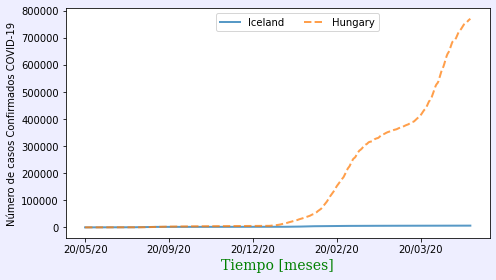

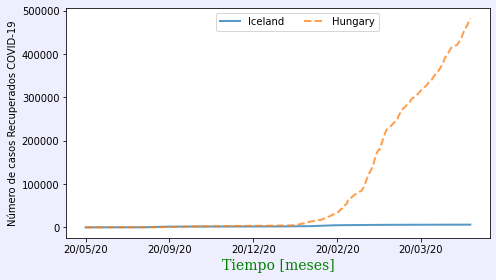

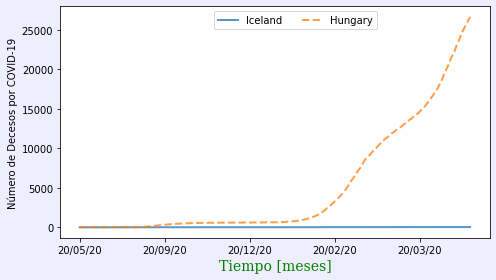

In [166]:
# (A) Escoger 2 paises arbitrariamente 
# (B) Mostrar gráficos en tabs 

def handle_country1(change, c1 = 'Australia'):
    display(f"Pais escogido: {change['new']}")
    c1 = change['new']


def handle_country2(change, c2 = 'Australia'):
    display(f"Pais escogido: {change['new']}")
    c2 = change['new']
    
def data_by_country(c, data):
    return np.array([col for col in data.loc[c]])
    
def show_tabs(evt):
    tab_contents = ['Casos Confirmados', 'Casos Recuperados' , 'Decesos']
    
    #Confirmados
    plot_conf = widgets.Output()
    #Recuperados 
    plot_rec = widgets.Output()
    #Decesos
    plot_dec = widgets.Output()
    
    tab = widgets.Tab(children = [plot_conf, plot_rec, plot_dec])
    
    for i, title in enumerate(tab_contents):
        tab.set_title(i, title)
    
    display(tab)
    
    with plot_conf:
        data_country1_conf = data_by_country(country1.value, conf_df)
        data_country2_conf = data_by_country(country2.value, conf_df)
        
        fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='#EEF')
        ax.set_xlabel('Tiempo [meses]', fontsize=14, fontname='serif', color="green")
        ax.set_ylabel('Número de casos Confirmados COVID-19')
        
        ax.plot(data_country1_conf, 
        linewidth=2, # Ancho de la linea
        alpha=0.75, # Opacidad
        label=country1.value) # Etiqueta para la leyenda
        
        ax.plot(data_country2_conf,
        linestyle='--',
        linewidth=2, 
        alpha=0.75, 
        label=country2.value)
        
        # Leyenda
        ax.set_xticklabels(['20/01/20', '20/05/20', '20/09/20','20/12/20',
                           '20/02/20','20/03/20'])
        ax.legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1))
        
    with plot_rec:
        data_country1_rec = data_by_country(country1.value, rec_df)
        data_country2_rec = data_by_country(country2.value, rec_df)
        
        fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='#EEF')
        ax.set_xlabel('Tiempo [meses]', fontsize=14, fontname='serif', color="green")
        ax.set_ylabel('Número de casos Recuperados COVID-19')
        
        ax.plot(data_country1_rec, 
        linewidth=2, # Ancho de la linea
        alpha=0.75, # Opacidad
        label=country1.value) # Etiqueta para la leyenda
        
        ax.plot(data_country2_rec,
        linestyle='--',
        linewidth=2, 
        alpha=0.75, 
        label=country2.value)
        
        # Leyenda
        ax.set_xticklabels(['20/01/20', '20/05/20', '20/09/20','20/12/20',
                           '20/02/20','20/03/20'])
        ax.legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1))
    
    with plot_dec:
        data_country1_dec = data_by_country(country1.value, decesos_df)
        data_country2_dec = data_by_country(country2.value, decesos_df)
        fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='#EEF')
        ax.set_xlabel('Tiempo [meses]', fontsize=14, fontname='serif', color="green")
        ax.set_ylabel('Número de Decesos por COVID-19')
        
        ax.plot(data_country1_dec, 
        linewidth=2, # Ancho de la linea
        alpha=0.75, # Opacidad
        label=country1.value) # Etiqueta para la leyenda
        
        ax.plot(data_country2_dec,
        linestyle='--',
        linewidth=2, 
        alpha=0.75, 
        label=country2.value)
        
        # Leyenda
        ax.set_xticklabels(['20/01/20', '20/05/20', '20/09/20','20/12/20',
                           '20/02/20','20/03/20'])
        ax.legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1))
     
    

country1 = widgets.Dropdown(description="Pais 1:", 
                              options=ocde_countries)

country2 = widgets.Dropdown(description="Pais 2:", 
                              options=ocde_countries)

push_data = widgets.Button(description="Enviar")


country1.observe(handle_country1, names='value')
country2.observe(handle_country2, names='value')
push_data.on_click(show_tabs)

widgets.HBox([country1, country2, push_data])









### Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). Entregue el link de su dashboard web